In [1]:
import os
import time
import string

import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

from tqdm import tqdm

# Font
from matplotlib import font_manager
font_path = "/workspace/fonts/"
font_list = os.listdir(font_path)
for font_file in font_list:
    try:
        font_manager.fontManager.addfont(font_path + font_file)
    except:
        raise Exception(f"Cannot Load {font_path+font_file}")


'''
N_ROW = 1
N_COL = 2
X_SIZE = 6
Y_SIZE = 4
DPI = 300
# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)
axes = []

axi=0
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

x.plot('value', cmap='Blues', ax=ax, legend=True)
plt.title('Total Amount of Fundings [KRW]')
plt.text(133.3, 38.7, 'log10', fontsize=8)
plt.ylabel('lat')
plt.xlabel('lon')

axi=1
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')
plt.plot(10**x.sort_values('value')['value'].values[::-1], 'o-')
plt.ylabel('Total Amount of Fundings [KRW]')
plt.xlabel('Rank of Area')
plt.yscale('log')
'''

"\nN_ROW = 1\nN_COL = 2\nX_SIZE = 6\nY_SIZE = 4\nDPI = 300\n# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']\nplt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']\n\nfig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)\nspec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)\naxes = []\n\naxi=0\nax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col\nax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')\n\nx.plot('value', cmap='Blues', ax=ax, legend=True)\nplt.title('Total Amount of Fundings [KRW]')\nplt.text(133.3, 38.7, 'log10', fontsize=8)\nplt.ylabel('lat')\nplt.xlabel('lon')\n\naxi=1\nax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col\nax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')\nplt.plot(10**x.sort_values('value')['value'].values[::-1], 'o-')\nplt.ylabel('Total Amount of Fundings [KRW]')\

In [2]:
df = pd.read_parquet('Data_Mid/Mid_Data_v7.1.parquet')

In [101]:
df

0      1      2      3      4      5      6      7      8      \
화장료 조성물         5      5      0      5      5      5      5      5      5   
약학적 조성물         0      5      0      5      5      5      5      5      5   
식품 조성물          0      5      0      5      5      5      0      5      5   
추출              0      0      0      0      0      6      0      0      0   
피부 미백           0      0      1      0      1      0      0      0      0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
폴리쿼터니움10        0      0      0      0      0      0      0      0      0   
기억 능력           0      0      0      0      0      0      0      0      0   
나노캡슐 조성물        0      0      0      0      0      0      0      0      0   
히아루론산 합성        0      0      0      0      0      0      0      0      0   
피부 알레르기 예방      0      0      0      0      0      0      0      0      0   

            9      ...  19554  19555  19556  19557  19558  19559  19560  \
화장료 조성물         5  ...      0      5      5      5      0      5      5   
약학적 조성물         5  ...      0      5      5      5      0      5      0   
식품 조성물          5  ...      0      5      5      5      0      5      0   
추출              6  ...      0      0      0      0      0      0      0   
피부 미백           0  ...      0      0      0      0      0      0      0   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
폴리쿼터니움10        0  ...      0      0      0      0      0      0      0   
기억 능력           0  ...      0      0      0      0      0      0      0   
나노캡슐 조성물        0  ...      0      0      0      0      0      0      0   
히아루론산 합성        0  ...      0      0      0      0      0      0      0   
피부 알레르기 예방      0  ...      0      0      0      0      0      0      0   

            19561  19562  19563  
화장료 조성물         0      0      0  
약학적 조성물         0      0      0  
식품 조성물          0      0      0  
추출              0      0      0  
피부 미백           0      0      0  
...           ...    ...    ...  
폴리쿼터니움10        0      0      0  
기억 능력           0      0      0  
나노캡슐 조성물        0      0      0  
히아루론산 합성        0      0      0  
피부 알레르기 예방      0      0      0  

[28203 rows x 19564 columns]

In [35]:
df_raw = pd.read_parquet('raw_data.parquet')

In [3]:
df_item = pd.read_parquet("Data_Mid/Count_keywords_v2.parquet")
df_item_year = pd.read_parquet('Data_Mid/Count_keywords_year_v2.parquet')

In [4]:
(df_item["category"] == "Unknown").sum()

108

In [5]:
cate_conv = {
    '효능': "Efficacy", 
    '기작': "Mechanism", 
    '성분/물질': "Ingredient/\nSubstance", 
    '천연소재': "Natural", 
    '제형/제품': "Formulation/\nProduct", 
    '기술/제조': "Technique/\nManufacturing", 
    '특성': "Characteristics",
    'Unknown': "Unknown"
}
cate_conv_ivs = {'Efficacy': '효능',
 'Mechanism': '기작',
 'Ingredient/\nSubstance': '성분/물질',
 'Natural': '천연소재',
 'Formulation/\nProduct': '제형/제품',
 'Technique/\nManufacturing': '기술/제조',
 'Characteristics': '특성',
 'Unknown': 'Unknown'}

In [6]:
_df_item_year = df_item_year.copy()
_df_item_year.columns = [df_item.loc[col,'category'] for col in df_item_year.columns]

In [7]:
_df_item_year

제형/제품  제형/제품  제형/제품  기술/제조   효능   효능   효능   효능   효능   효능  ...  효능  \
출원연도                                                            ...       
1996      0      0      0      0    0    0    0    0    0    0  ...   0   
1997      5      4      4      0    0    0    0    1    0    1  ...   0   
1998      7      3      0      2    1    0    0    1    0    1  ...   0   
1999     12      3      0      4    4    4    1    4    2    0  ...   0   
2000     21     24      6      9    8    7    9   14    3    7  ...   0   
2001     64     49     15     10   25   12   19   11    5   16  ...   0   
2002     91     54     27     13   25   14   24   16   23   13  ...   0   
2003     97     77     38     24   36   24   36   29   23   19  ...   0   
2004    189    156     65     70   67   42   54   42   36   51  ...   0   
2005    294    249    133    126  121   81   92   97   54   77  ...   0   
2006    334    296    135    121  117   96   82  113   82   96  ...   0   
2007    451    411    235    223  212  148  156  171  136  126  ...   0   
2008    482    383    193    237  198  150  155  174  100  110  ...   0   
2009    485    385    144    230  178  157  162  153  121  126  ...   0   
2010    541    422    199    252  189  147  168  130  148  110  ...   0   
2011    491    367    207    252  181  153  141   93   81  107  ...   0   
2012    477    392    214    191  183  153  158  107  121   96  ...   0   
2013    626    500    268    189  232  188  191  118  168  139  ...   0   
2014    857    720    349    338  358  342  283  145  204  218  ...   0   
2015    939    722    405    351  366  363  347  227  212  262  ...   0   
2016   1306   1065    643    550  513  541  434  295  377  299  ...   0   
2017   1343   1079    676    553  433  458  437  324  303  330  ...   1   
2018   1359   1060    714    541  406  510  370  360  353  363  ...   1   
2019   1226    874    518    509  399  420  393  293  311  307  ...   0   
2020    326    273    173    131  100  129  120   72   94   81  ...   0   
2021     25     24     22      6   13   11   12    4    8    8  ...   0   

      기술/제조  성분/물질  특성  기술/제조  성분/물질  효능  제형/제품  기작  효능  
출원연도                                                     
1996      0      0   0      0      0   0      0   0   0  
1997      0      0   0      0      0   0      0   0   0  
1998      0      0   0      0      0   0      0   0   0  
1999      0      0   0      0      0   0      0   0   0  
2000      0      0   0      0      0   0      0   0   0  
2001      0      0   0      0      0   0      0   0   0  
2002      0      0   0      0      0   0      0   0   0  
2003      0      0   0      0      0   0      0   0   0  
2004      0      0   0      0      0   0      0   0   0  
2005      0      0   0      0      0   0      1   0   0  
2006      0      0   0      0      0   0      0   0   0  
2007      0      1   0      1      0   0      0   1   0  
2008      0      0   0      1      0   0      0   0   0  
2009      0      0   0      0      1   0      0   0   0  
2010      0      0   2      0      0   0      0   0   0  
2011      0      0   0      0      1   0      0   0   0  
2012      0      0   0      0      0   0      0   0   0  
2013      0      0   0      0      0   0      0   0   0  
2014      0      1   0      0      0   0      0   0   0  
2015      0      0   0      0      0   0      0   0   0  
2016      0      0   0      0      0   0      0   0   1  
2017      2      0   0      0      0   0      1   0   0  
2018      0      0   0      0      0   0      0   0   0  
2019      0      0   0      0      0   1      0   1   1  
2020      0      0   0      0      0   1      0   0   0  
2021      0      0   0      0      0   0      0   0   0  

[26 rows x 28203 columns]

In [9]:
_df_item_year = df_item_year.copy()
_df_item_year.columns = [df_item.loc[col,'category'] for col in df_item_year.columns]


temp = _df_item_year.T.reset_index().groupby('index').sum().iloc[1:].T
idx = temp.index
idx.name = 'year'
idx = idx.astype(int)
temp.index = idx
temp.columns = [cate_conv[x] for x in temp.columns]


temp2 = (_df_item_year.T > 0).reset_index().groupby('index').sum().iloc[1:].T
idx = temp2.index
idx.name = 'year'
idx = idx.astype(int)
temp2.index = idx
temp2.columns = [cate_conv[x] for x in temp2.columns]

In [10]:
temp2.loc[2021].sort_values()[::-1].index

Index(['Efficacy', 'Natural', 'Ingredient/\nSubstance', 'Mechanism',
       'Characteristics', 'Formulation/\nProduct'],
      dtype='object')

Text(0, 0.5, 'Ratio of distinct keywords')

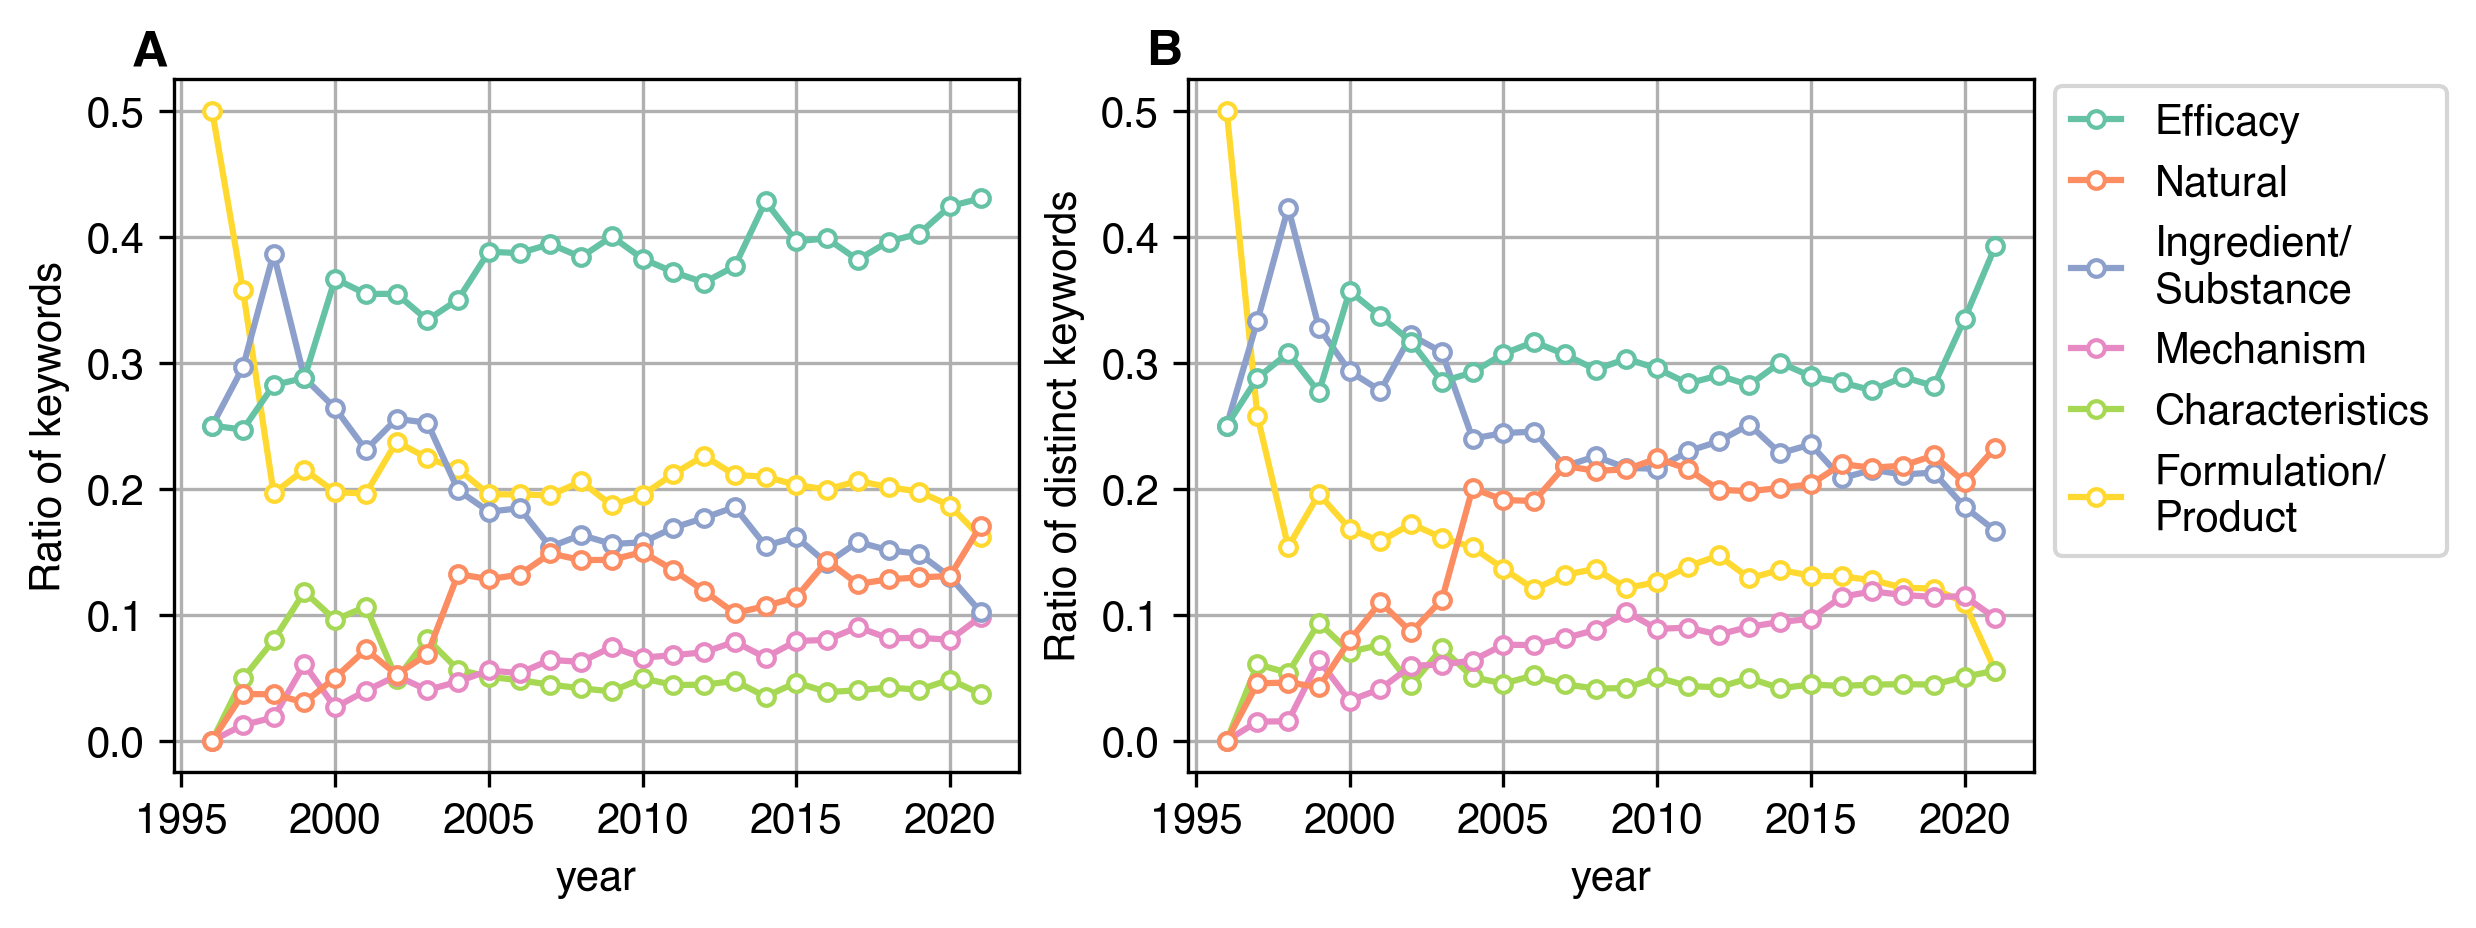

In [11]:
import string
import seaborn as sns

N_ROW = 1
N_COL = 2
X_SIZE = 4
Y_SIZE = 3
DPI = 300
# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

# Set the color palette
palette = sns.color_palette("Set2")
# palette = sns.color_palette("husl", 8)
col_ordered = temp2.loc[2021].sort_values()[::-1].index

fig = plt.figure(figsize=(X_SIZE * N_COL, Y_SIZE * N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)  # , width_ratios=[1,1,.1], wspace=.3
axes = []

axi = 0
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL])  # row, col
ax.text(-.05, 1.02, '%s' % (string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

_temp = (temp.T / temp.sum(axis=1)).T
for axi, (column, color) in enumerate(zip(col_ordered, palette)):
    _temp[column].plot(marker='o', markersize=4, markerfacecolor="white", ax=ax, color=color, zorder=100-axi)
# (temp.T / temp.sum(axis=1)).T.plot()
plt.grid()
# plt.legend("none")
# plt.legend(title=None, ncol=1, handlelength=1.2, )
plt.ylabel("Ratio of keywords")
# plt.xlim([1996,2021])
# plt.ylim([0, 0.5])

axi = 1
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL])  # row, col
ax.text(-.05, 1.02, '%s' % (string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

_temp = (temp2.T / temp2.sum(axis=1)).T
for axi, (column, color) in enumerate(zip(col_ordered, palette)):
    _temp[column].plot(marker='o', markersize=4, markerfacecolor="white", ax=ax, color=color, zorder=100-axi)
plt.grid()
# (temp.T / temp.sum(axis=1)).T.plot()
# plt.legend(title=None, ncol=1, handlelength=1.1, bbox_to_anchor=(1, 1.02))
plt.legend(title=None, ncol=1, handlelength=1.2, bbox_to_anchor=(1, 1.02), labels=[label for label in col_ordered])
plt.ylabel("Ratio of distinct keywords")
# plt.xlim([1996,2021])
# plt.ylim([0, 0.5])


In [29]:
kwd_to_cate = df_item['category'].to_dict()
df_cate = (df.copy() > 0).astype(int)
df_cate['category'] = [kwd_to_cate[x] for x in df_cate.index]

In [30]:
_df_cate = df_cate.groupby('category').sum()

In [38]:
_df_cate = _df_cate.T

In [39]:
_df_cate['year'] = df_raw['출원연도']

In [61]:
_df_cate.columns = [
    cate_conv[x] if x in cate_conv else "year" 
    for x in _df_cate.columns
]

In [280]:
from sklearn.manifold import TSNE

# Step 2: t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=20, max_iter=250)
tsne_results = tsne.fit_transform(_df_cate[cols])

# Step 3: t-SNE 결과를 데이터프레임으로 변환
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE1', 't-SNE2'])

In [419]:
import umap

reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
X_embedded = reducer.fit_transform(_df_cate[cols])

umap_df = pd.DataFrame(X_embedded)
umap_df['cluster'] = labels
umap_df

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


0          1  cluster
0      15.935478 -13.721303        4
1      15.545220 -12.562046        4
2       6.634947  -8.429487        0
3       8.943143 -11.060969        2
4       3.741127  -7.210927        0
...          ...        ...      ...
19559  12.897908 -11.033463        1
19560  14.574166 -15.613961        4
19561  15.295878 -16.237307        4
19562  13.835708 -16.034496        4
19563  14.672395 -15.390196        4

[19564 rows x 3 columns]

In [349]:
from sklearn.mixture import GaussianMixture

X = _df_cate[_df_cate.columns[:-1]].values

# GMM 모델 생성 및 학습
gmm = GaussianMixture(n_components=4, covariance_type='spherical', random_state=42, init_params='k-means++')
gmm.fit(X)
labels = gmm.predict(X)

_df_cate['cluster'] = labels
_df_cate.groupby('cluster').mean()

Technique/\nManufacturing  Mechanism  Ingredient/\nSubstance  \
cluster                                                                 
0                         1.403175   2.591534                3.770018   
1                         0.865335   1.430981                1.421899   
2                         1.253722   0.648943                2.251970   
3                         1.033388   0.718148                2.508398   

         Formulation/\nProduct   Natural  Characteristics   Efficacy  \
cluster                                                                
0                     3.689242  5.589771         0.572487   9.390829   
1                     3.202647  1.542553         0.452776  10.770628   
2                     2.726511  1.161016         0.690479   3.050669   
3                     2.883245  1.197050         0.765670   4.300082   

                year  
cluster               
0        2012.984480  
1        2016.086663  
2        2016.440385  
3        2007.469889

In [473]:
_df_cate.groupby(_clst).count()['year']

Agglomerative_cluster
0    12212
1     1397
2     2864
3     1579
4      652
5      860
Name: year, dtype: int64

In [459]:
cols = ['Efficacy', 'Mechanism', 'Natural', 'Ingredient/\nSubstance', 'Technique/\nManufacturing', 'Characteristics', 'Formulation/\nProduct']

In [481]:
from scipy.cluster.hierarchy import linkage, fcluster

# Agglomerative 클러스터링: Linkage Matrix 생성
linkage_matrix = linkage(X, method='ward')
linkage_matrix_scaled = linkage(X_scaled, method='ward')

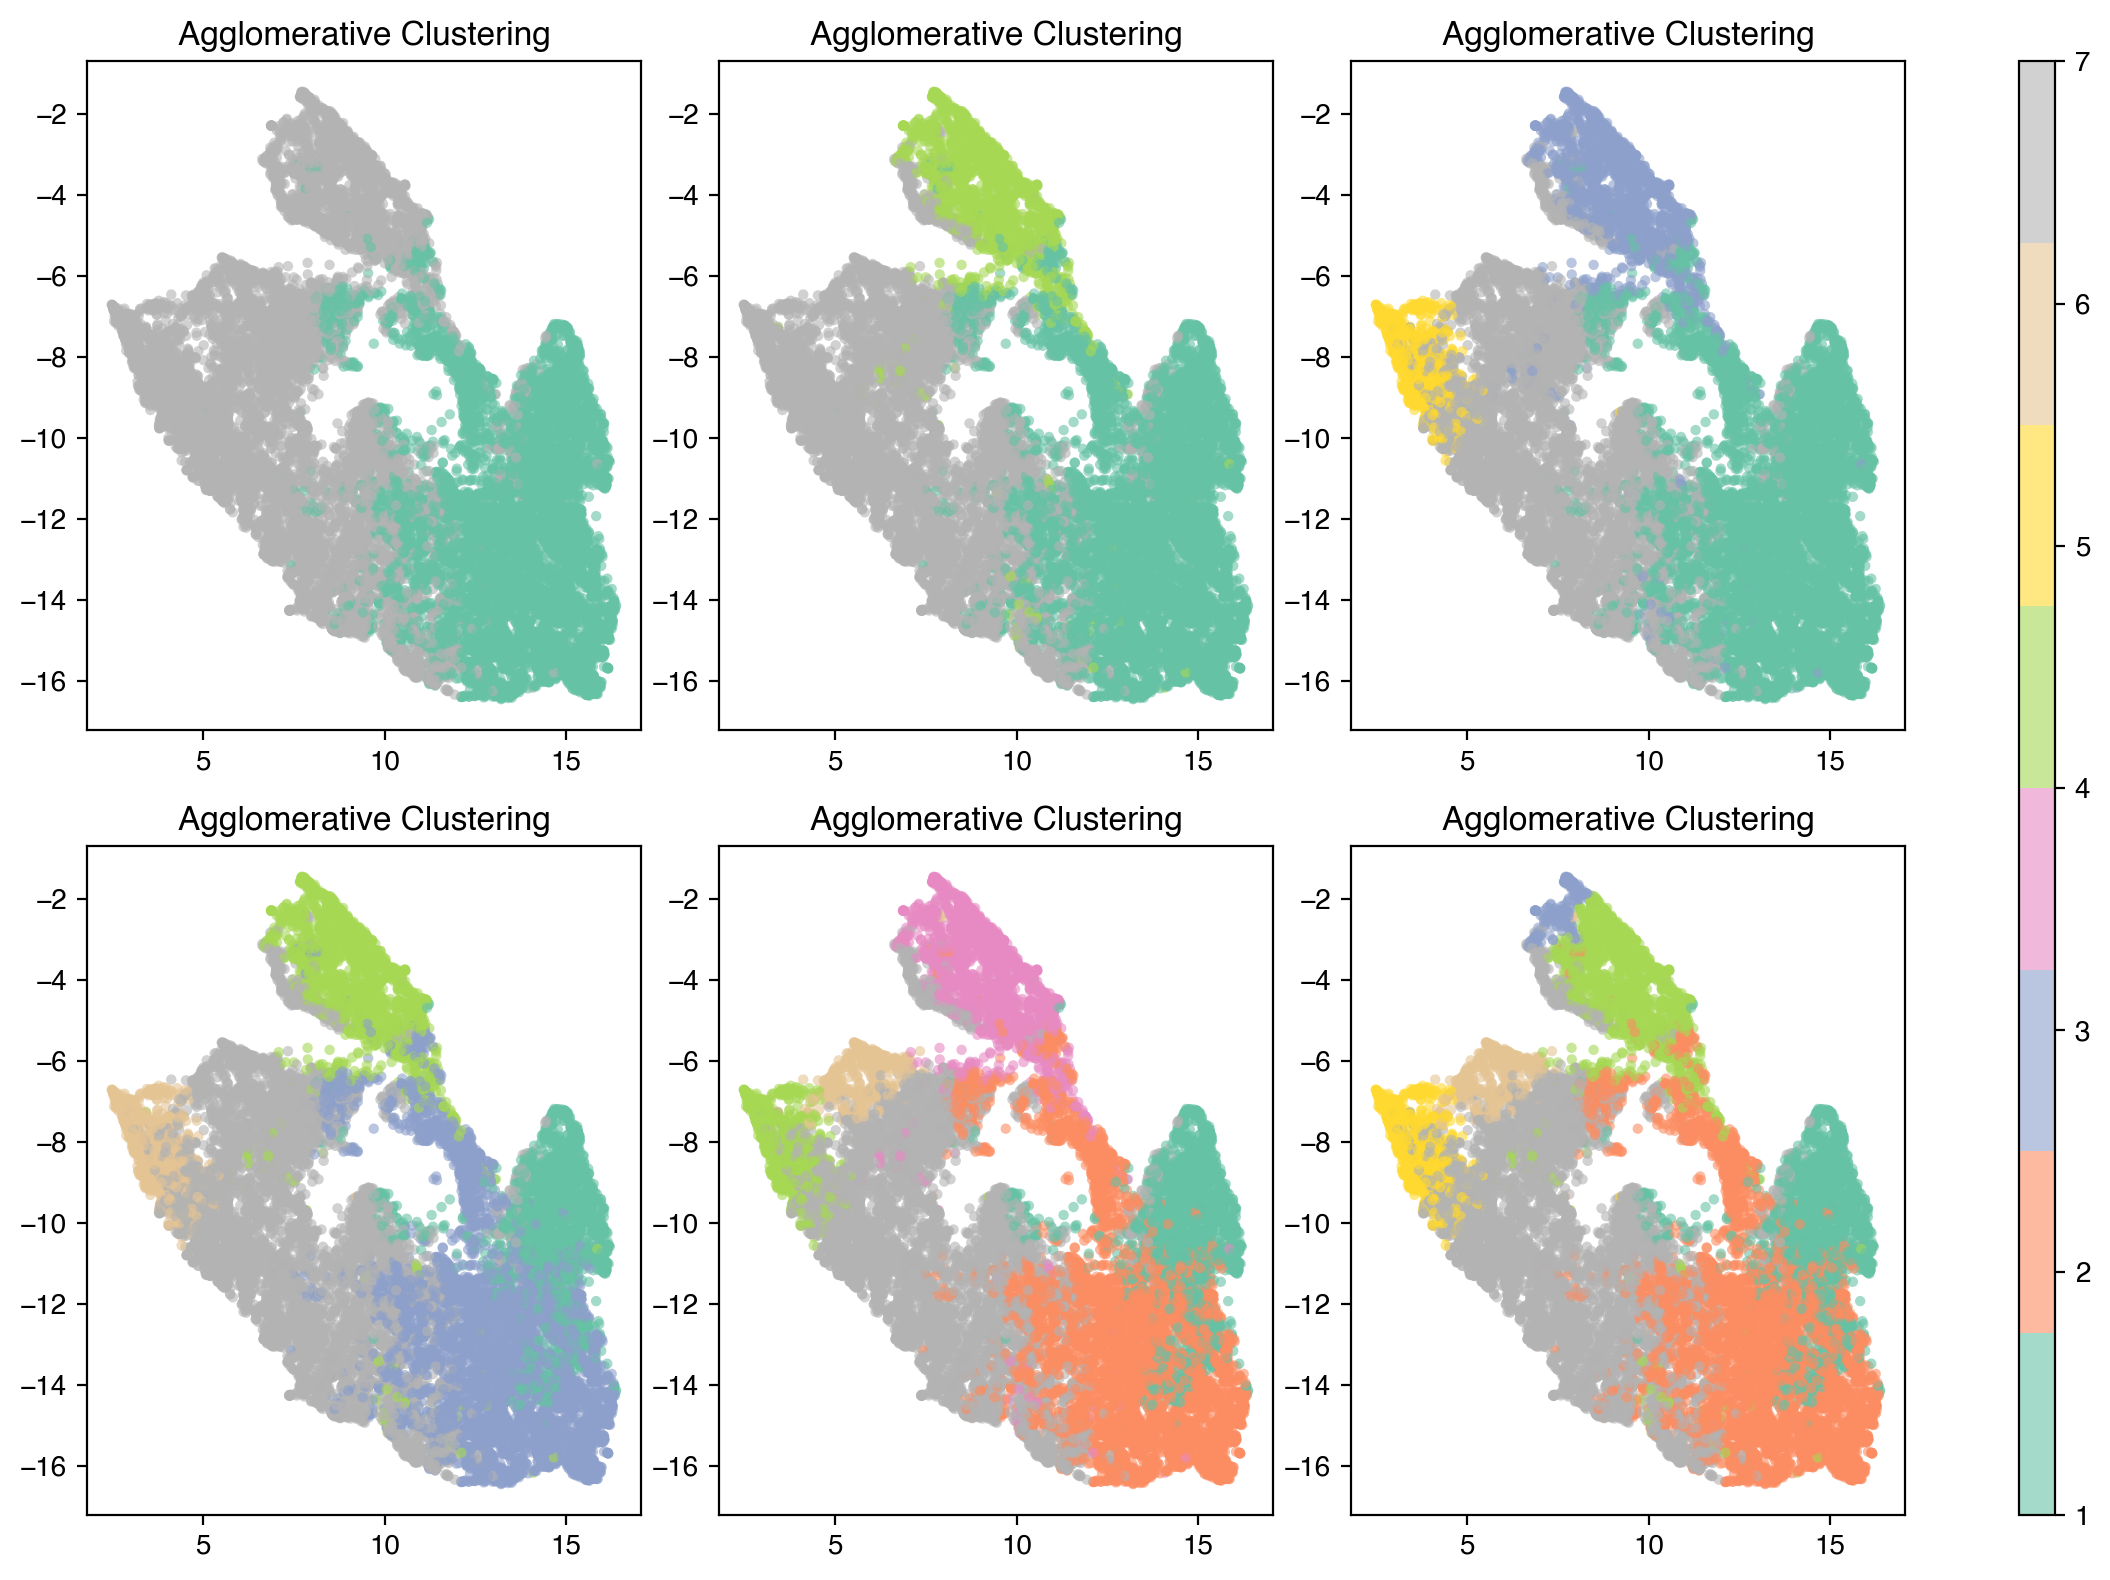

In [482]:

# 다양한 n_clusters 적용
n_clusters_list = [2, 3, 4, 5, 6, 7]
cluster_results = {}

fig, axes = plt.subplots(2, 3, figsize=(12, 8), dpi=200)
axes = axes.flatten()
for axi, n_clusters in enumerate(n_clusters_list):
    # 클러스터 할당
    labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    cluster_results[n_clusters] = labels

    ax = axes[axi]
    scatter = ax.scatter(umap_df[0], umap_df[1], c=labels, cmap='Set2', s=14, alpha=0.6, edgecolor="none")
    ax.set_title(f"{name} Clustering")

plt.tight_layout()
plt.colorbar(scatter, ax=axes, location='right', aspect=40)
plt.show()

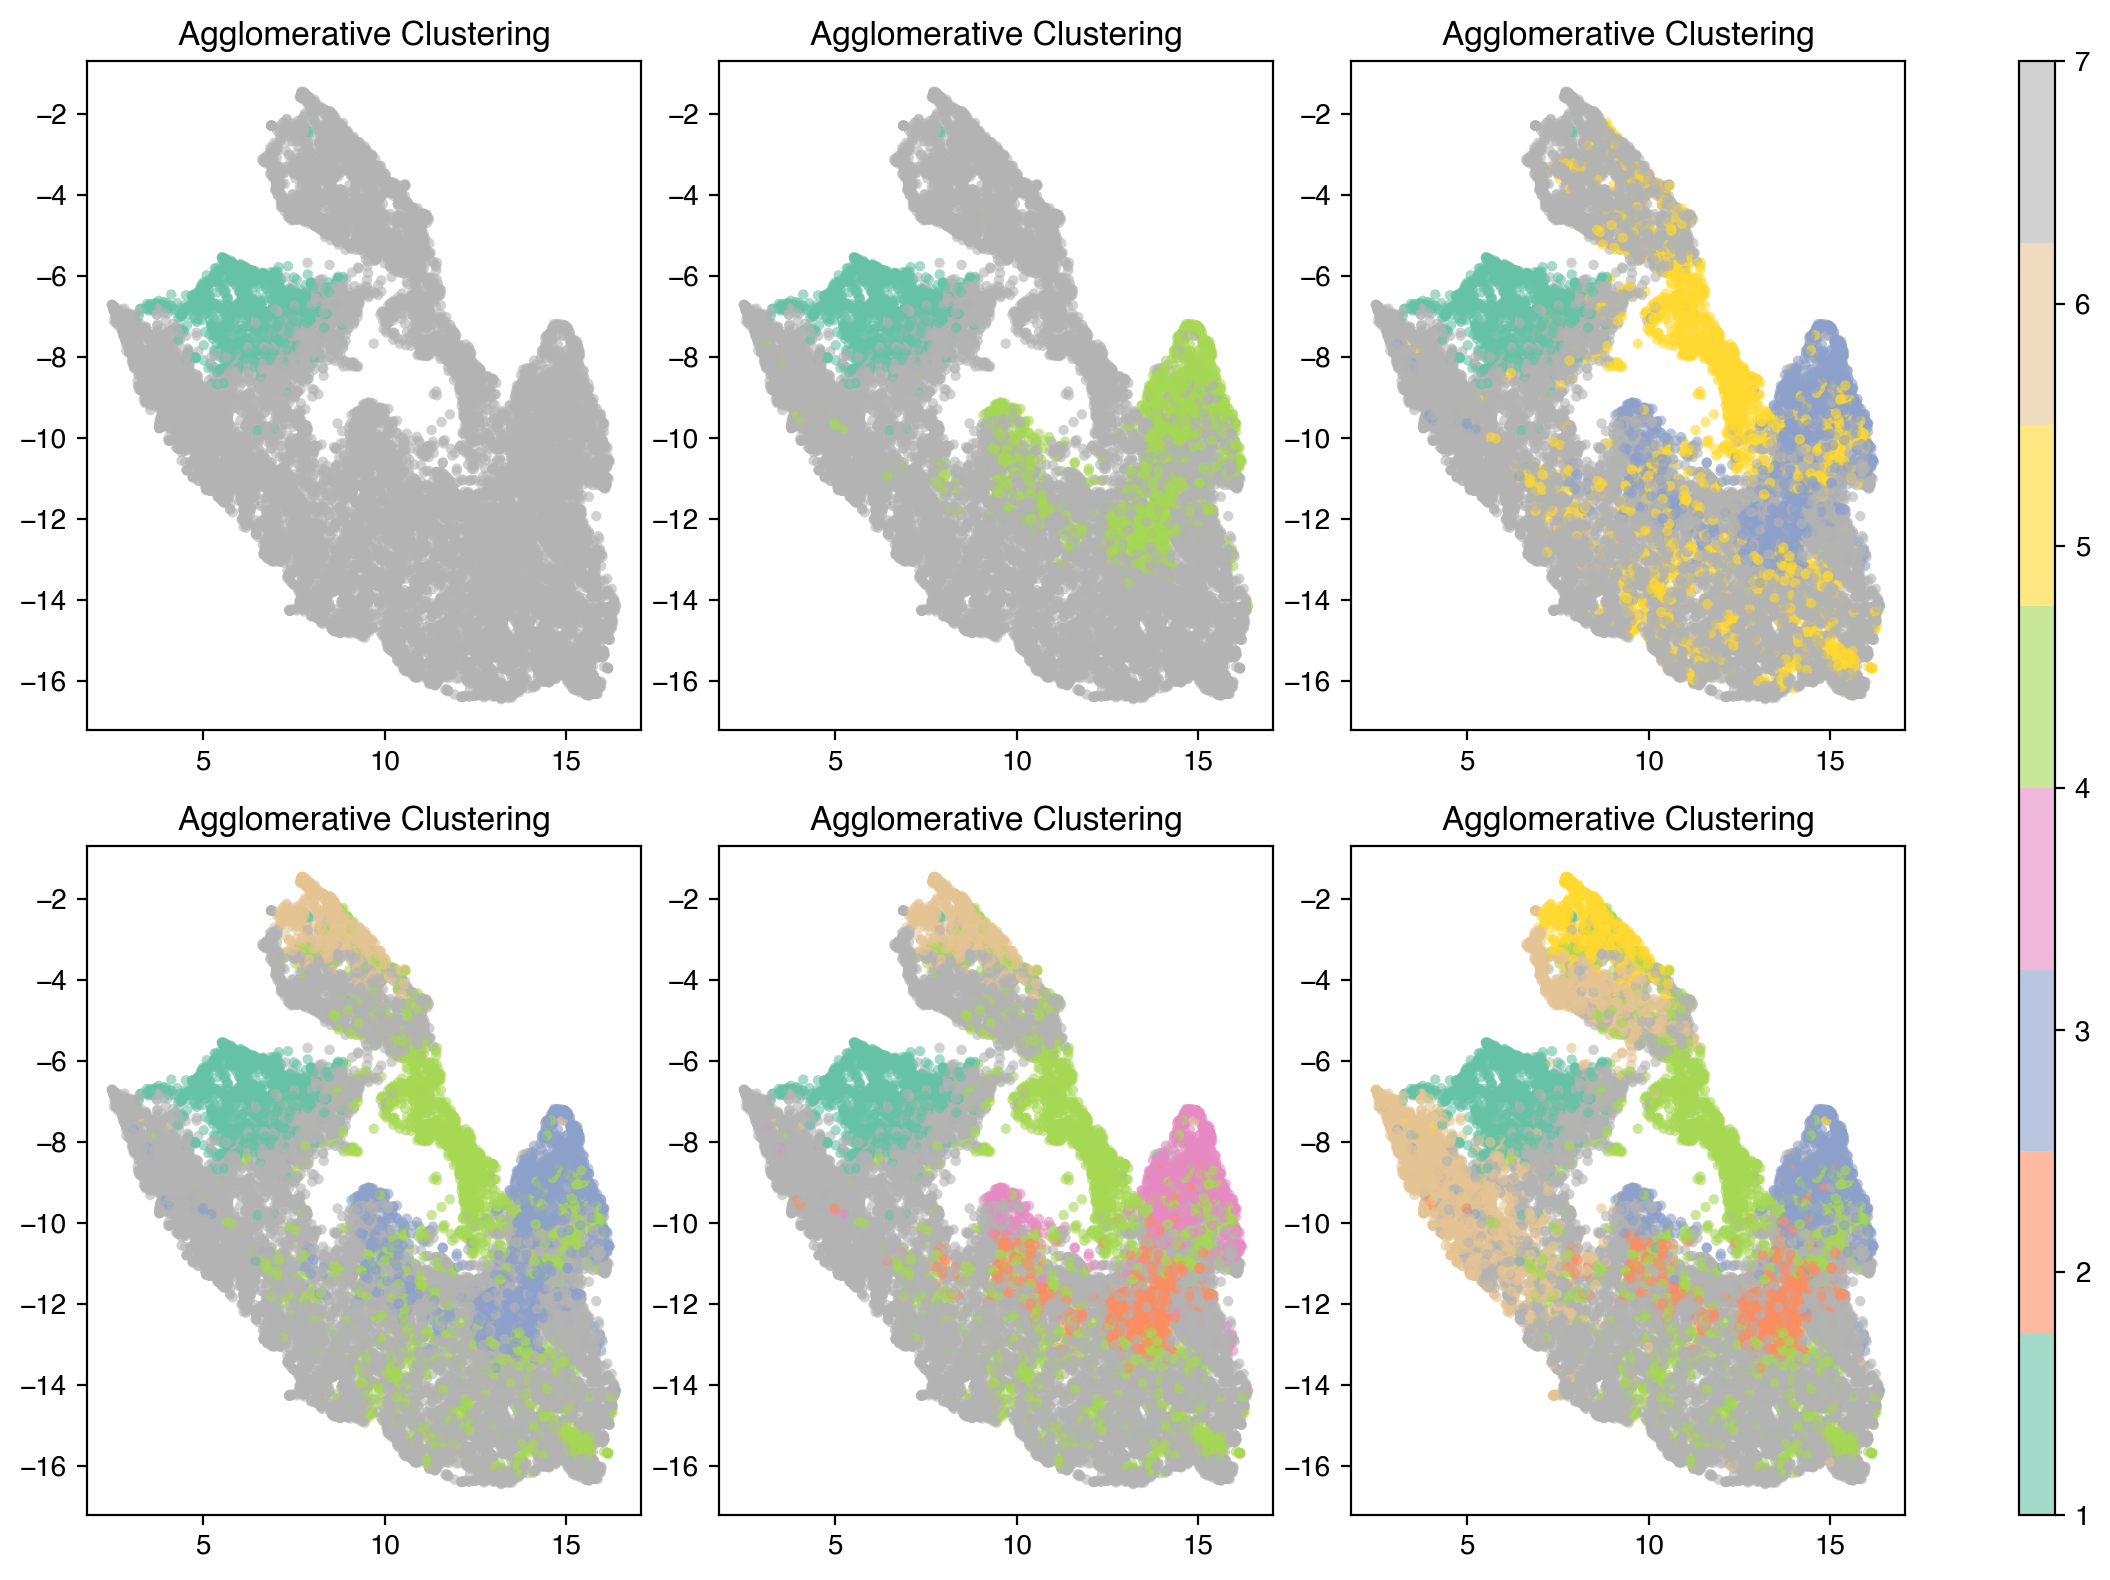

In [483]:

# 다양한 n_clusters 적용
n_clusters_list = [2, 3, 4, 5, 6, 7]
cluster_results = {}

fig, axes = plt.subplots(2, 3, figsize=(12, 8), dpi=200)
axes = axes.flatten()
for axi, n_clusters in enumerate(n_clusters_list):
    # 클러스터 할당
    labels = fcluster(linkage_matrix_scaled, t=n_clusters, criterion='maxclust')
    cluster_results[n_clusters] = labels

    ax = axes[axi]
    scatter = ax.scatter(umap_df[0], umap_df[1], c=labels, cmap='Set2', s=14, alpha=0.6, edgecolor="none")
    ax.set_title(f"{name} Clustering")

plt.tight_layout()
plt.colorbar(scatter, ax=axes, location='right', aspect=40)
plt.show()

/tmp/ipykernel_6508/1245865989.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


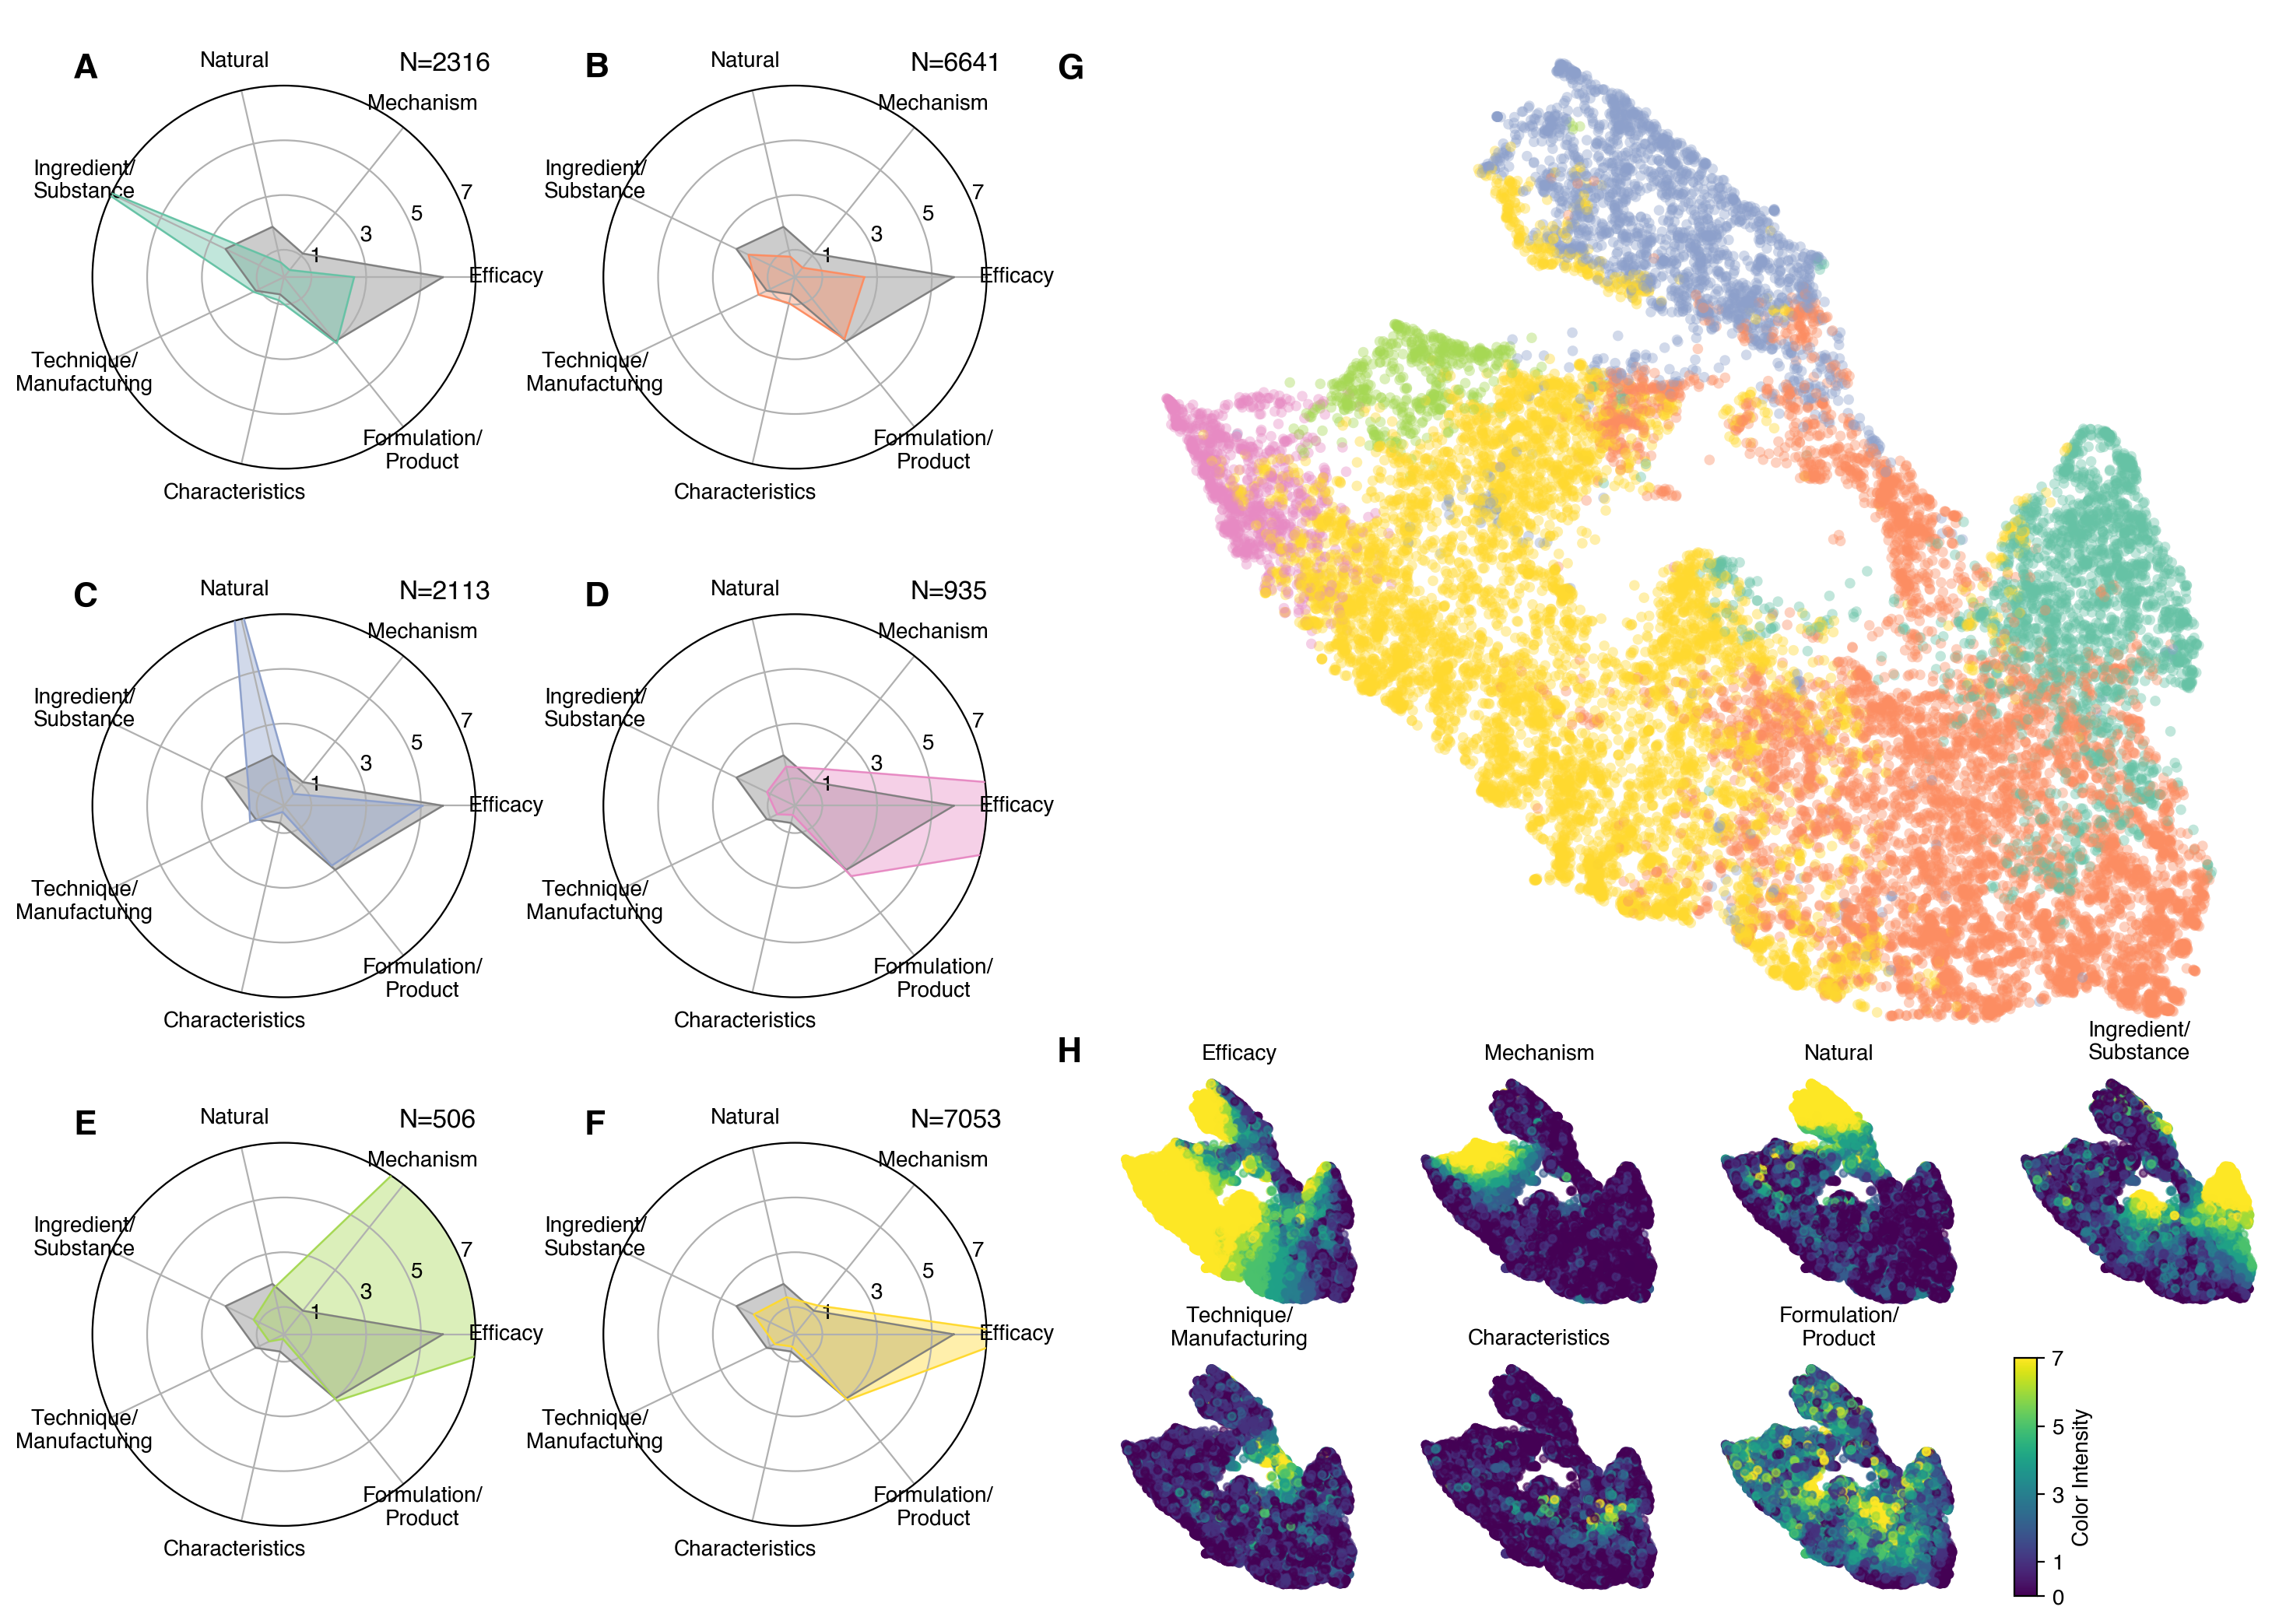

In [491]:
N_COL = 3
N_ROW = 4
X_SIZE = 6
Y_SIZE = 4.4
DPI = 200

n_clusters = 6
_clst = "cluster"
labels = labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
_df_cate[_clst] = labels

cluster_means = _df_cate.groupby(_clst).mean()[cols]

# 색상 팔레트 생성 (Set2 팔레트 사용)
palette = sns.color_palette("Set2", n_colors=len(cluster_means.index))
color_map = {cluster: palette[idx] for idx, cluster in enumerate(cluster_means.index)}

# Polar와 Scatter 색상을 동일하게 설정
fig = plt.figure(figsize=(X_SIZE * N_COL, Y_SIZE * N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig, hspace=.01, wspace=.2, width_ratios=[1, 1, 3.])
axes = []

gmean = _df_cate.mean()[cols]
gv = gmean.tolist()
gv += gv[:1]
clst_size = _df_cate.groupby(_clst).count()['year']

# Polar 플롯
for idx, cluster in enumerate(cluster_means.index):
    ax = fig.add_subplot(spec[idx // 2, idx % 2], projection='polar')  # row, col
    ax.text(-.05, 1.02, '%s' % (string.ascii_uppercase[idx]), transform=ax.transAxes, size=16, weight='bold')
    ax.text(.8, 1.04, f'N={clst_size[cluster]}', transform=ax.transAxes, size=12)
    
    values = cluster_means.loc[cluster,cols].tolist()
    values += values[:1]  # 다각형 닫기

    # Global Average
    ax.plot(angles, gv, label=f"Global Ave.", color="grey", linewidth=.8)
    ax.fill(angles, gv, alpha=0.4, color="grey")

    # Cluster-specific color
    ax.plot(angles, values, label=f"Cluster {cluster}", color=color_map[cluster], linewidth=.8, zorder=20)
    ax.fill(angles, values, alpha=0.4, color=color_map[cluster])

    # 축과 라벨 설정
    ax.set_yticks([1, 3, 5, 7])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(cols, zorder=10)
    ax.set_ylim(0, 7)
    plt.grid(zorder=0)

# Scatter 플롯
axi = 6
ax = fig.add_subplot(spec[:2, 2])  # row, col
ax.text(-.05, .94, '%s' % (string.ascii_uppercase[axi]), transform=ax.transAxes, size=16, weight='bold')

# Scatter plot에 클러스터 색상 적용
umap_df['cluster'] = labels
plt.scatter(umap_df[0], umap_df[1], c=umap_df['cluster'].map(color_map), s=24, alpha=.4, edgecolor="none")
ax.set_axis_off()  # 축과 눈금 제거
# plt.title("UMAP Scatter Plot")


axi = 7
ax = fig.add_subplot(spec[2, 2])  # row, col
ax.text(-.05, 1.02, '%s' % (string.ascii_uppercase[axi]), transform=ax.transAxes, size=16, weight='bold')
ax.set_axis_off()  # 축과 눈금 제거
spec2 = spec[2, 2].subgridspec(nrows=2, ncols=4, wspace=0.2, hspace=.2)


for idx, feature in enumerate(cols):
    sax = fig.add_subplot(spec2[idx // 4, idx % 4])  # row, col
    scatter = sax.scatter(umap_df.loc[:, 0], umap_df.loc[:, 1], c=data[feature], cmap='viridis', alpha=0.6, vmin=0, vmax=7, s=12)
    sax.set_title(f"{feature}", fontsize=10)
    sax.set_xlabel('UMAP Dim 1', fontsize=8)
    sax.set_ylabel('UMAP Dim 2', fontsize=8)

    sax.set_axis_off()  # 축과 눈금 제거

divide_ax = spec2[1, 3].subgridspec(nrows=1, ncols=2, width_ratios=[.1, .9])
cbar_ax = fig.add_subplot(divide_ax[0, 0])  # 2번째 행, 4번째 열 위치 지정

# Scatter와 동일한 컬러맵과 범위를 사용하지만 alpha를 제거한 컬러바 생성
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0, vmax=7)
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # ScalarMappable에 데이터 없이 색상 범위만 설정

# 컬러바 추가
cbar = fig.colorbar(
    sm, 
    cax=cbar_ax,  # 컬러바 축 지정
    orientation='vertical',  # 컬러바 방향
)
cbar_ax.set_yticks([0, 1, 3, 5, 7])
cbar.set_label('Color Intensity', fontsize=10)

plt.tight_layout()
plt.show()

# cbar = fig.colorbar(
#     scatter, 
#     cax=cbar_ax,  # 컬러바 축 지정
#     orientation='vertical',  # 컬러바 방향
#     shrink=0.1,  # 컬러바 길이 축소
#     aspect=.2   # 컬러바 두께 조정 (값이 클수록 얇아짐)
# )

# cbar_ax.set_yticks([0, 1, 3, 5, 7])
# cbar.set_label('Color Intensity', fontsize=10)
# plt.tight_layout()
# plt.show()

In [404]:
new_data = pd.DataFrame()
col_dict = {
    "F1": ["Efficacy"],
    "F2": ["Natural"],
    "F3": ["Mechanism"],
    "F4": ["Technique/\nManufacturing"],
    "F5": ["Ingredient/\nSubstance"],
    "F6": ["Formulation/\nProduct", "Characteristics"]
}
for _col in col_dict:
    new_data[_col] = data[col_dict[_col]].sum(axis=1)

In [405]:
new_data

F1  F2  F3  F4  F5  F6
0       0   1   0   1   4   2
1       0   1   0   1   5   4
2       9   2   4   1   1   1
3       8   0   0   1   4   5
4      19   0   5   0   0   3
...    ..  ..  ..  ..  ..  ..
19559   3   0   0   0   6   8
19560   0   0   0   1   0   3
19561   1   0   0   0   0   1
19562   2   1   0   1   2   1
19563   1   0   0   0   1   2

[19564 rows x 6 columns]

In [416]:
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, n_components=2, random_state=42)
X_embedded = reducer.fit_transform(new_data)

umap_df = pd.DataFrame(X_embedded)
umap_df['cluster'] = labels
umap_df

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


0          1  cluster
0      18.578882  15.091434        4
1      17.816887  14.896340        4
2       6.291739  14.081707        0
3       9.501336  17.008772        2
4       3.002388  14.532604        0
...          ...        ...      ...
19559  15.414281  13.479658        1
19560  17.417034  17.137436        4
19561  18.248325  18.613506        4
19562  16.804270  18.610100        4
19563  18.198111  17.294764        4

[19564 rows x 3 columns]

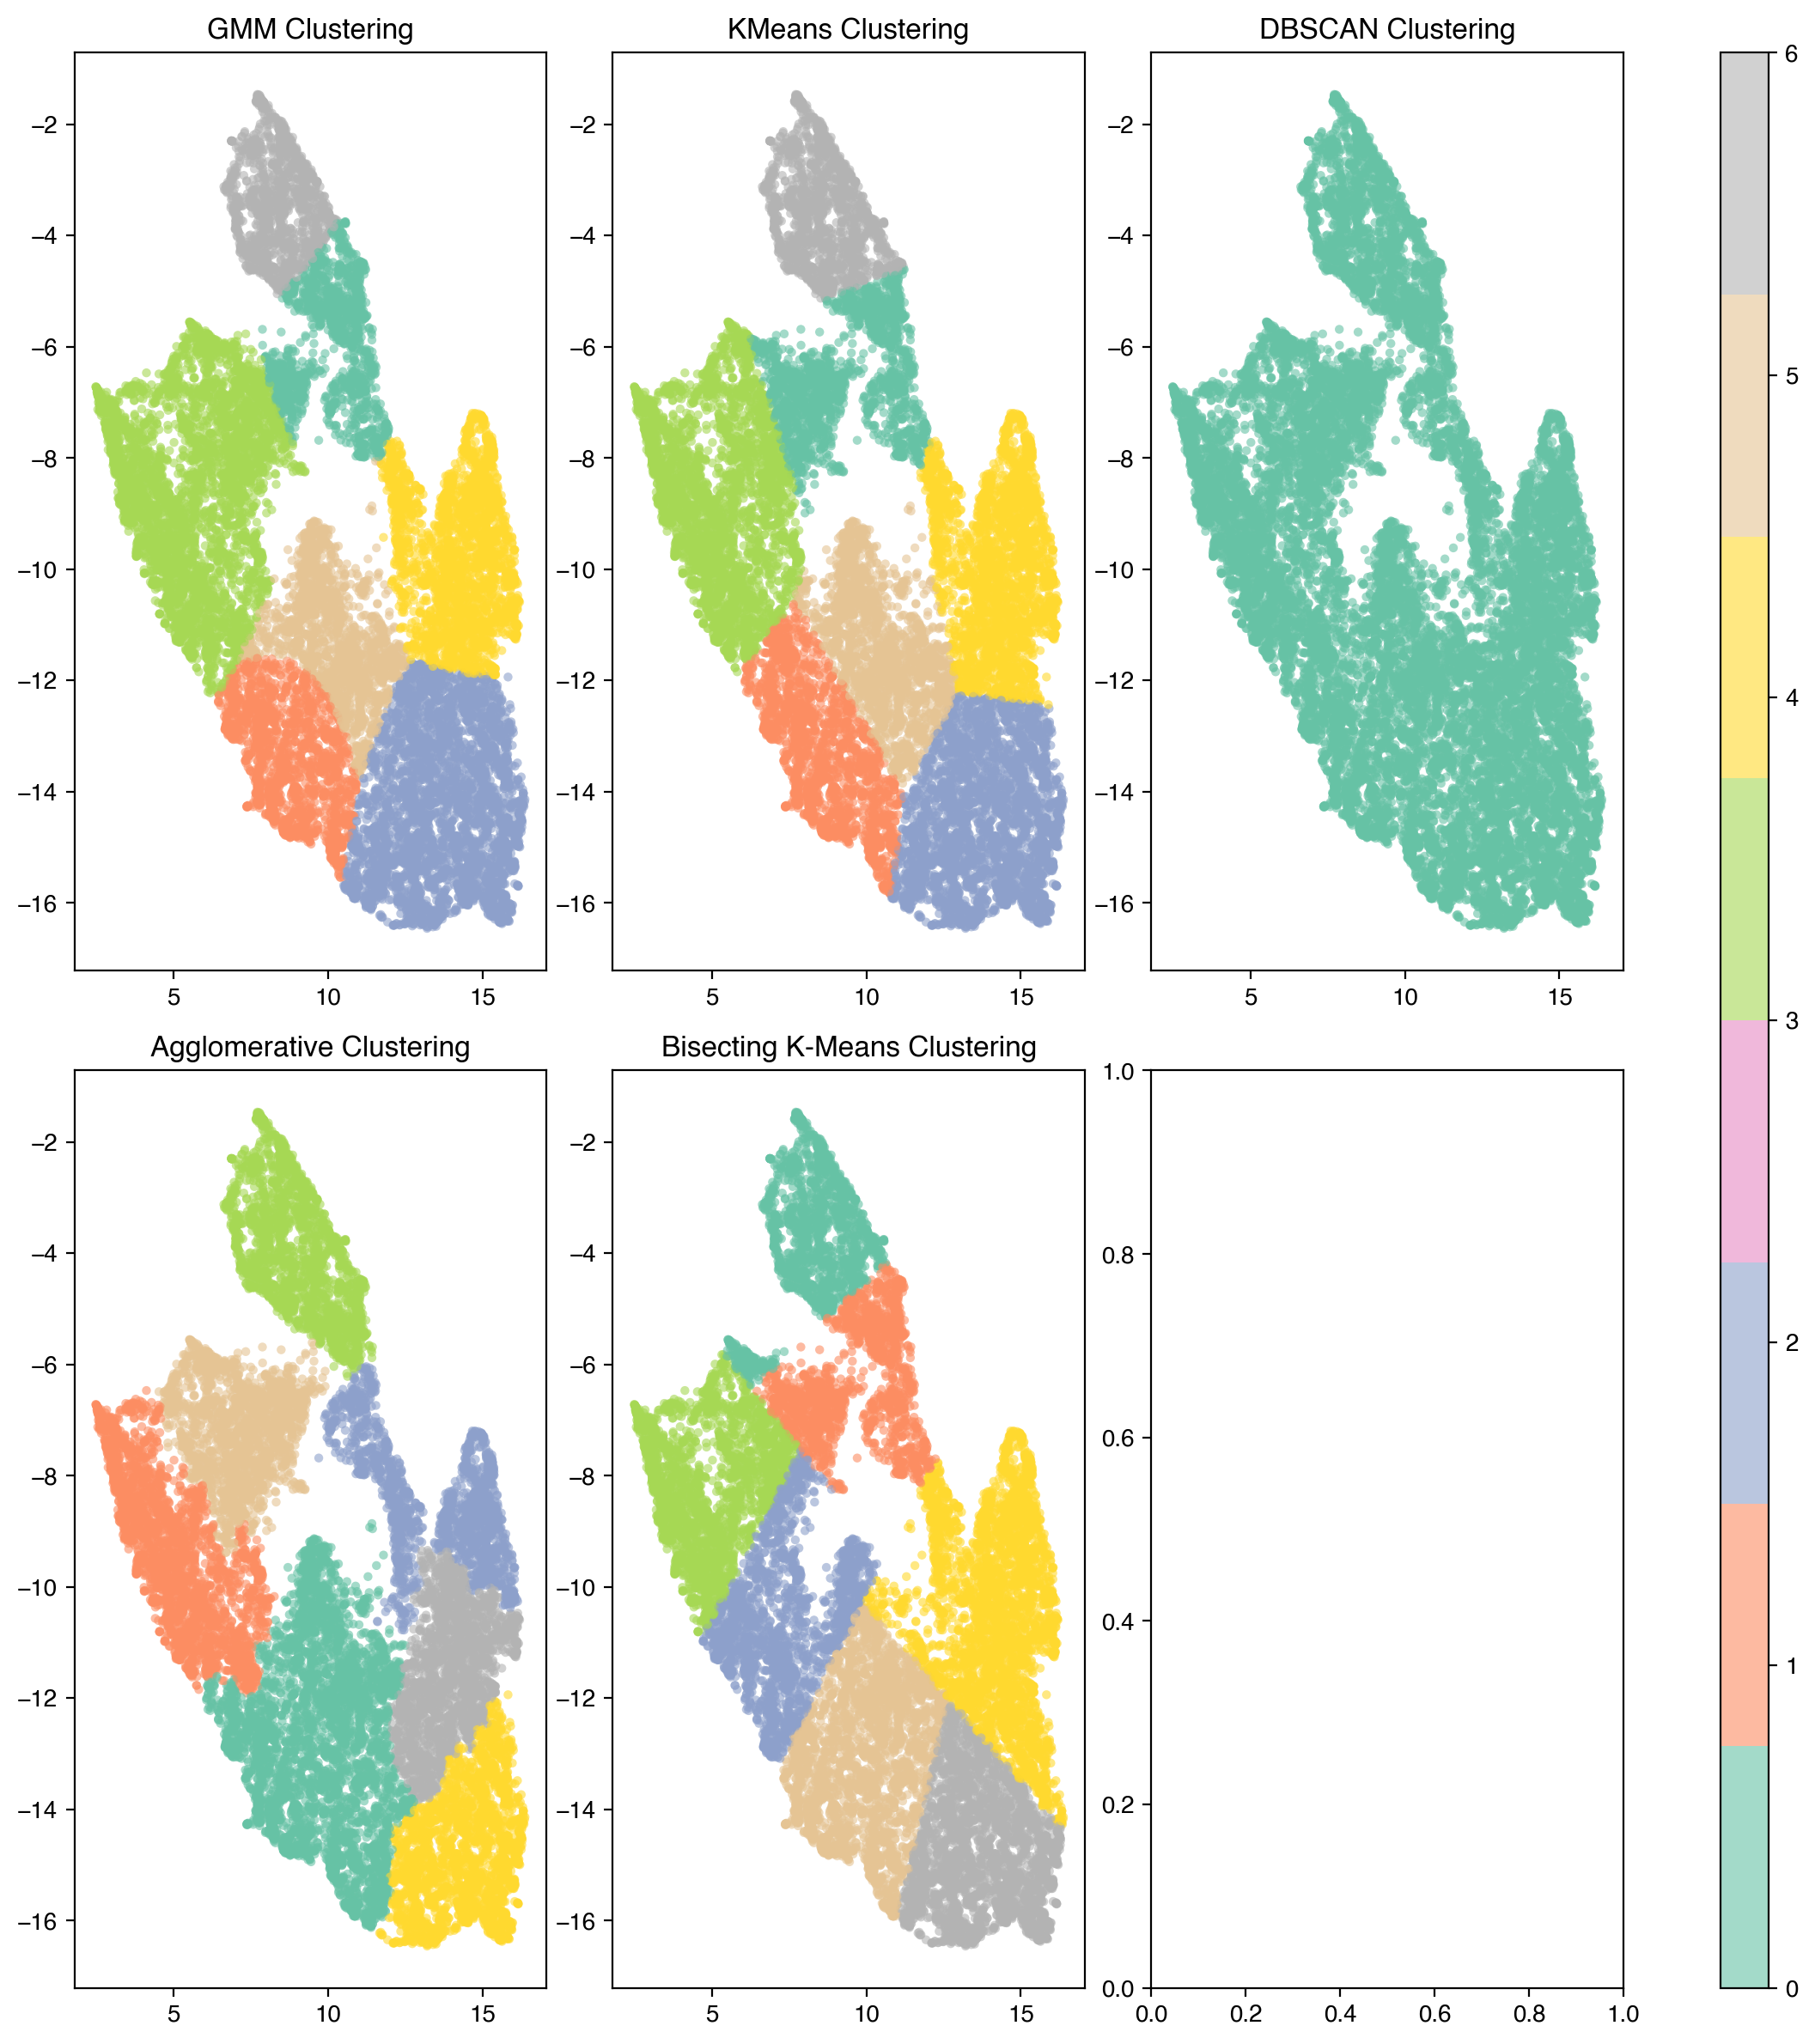

In [476]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.cluster import BisectingKMeans
from sklearn.preprocessing import StandardScaler

# 데이터 준비
# X = _df_cate[_df_cate.columns[:-1]].values
X = umap_df[[0, 1]].values
X_scaled = StandardScaler().fit_transform(X)  # 스케일링 (DBSCAN 등에 적합하게 하기 위해)

n_cluster = 7
# 클러스터링 방법 설정
methods = {
    'GMM': GaussianMixture(n_components=n_cluster, covariance_type='spherical', random_state=42, init_params='k-means++'),
    'KMeans': KMeans(n_clusters=n_cluster, random_state=42, init='k-means++'),
    'DBSCAN': DBSCAN(eps=10., min_samples=n_cluster),
    'Agglomerative': AgglomerativeClustering(n_clusters=n_cluster),
    "Bisecting K-Means": BisectingKMeans(n_clusters=n_cluster),
}

# 클러스터링 결과 저장
grouped_means = {}
fig, axes = plt.subplots(2, 3, figsize=(12, 12), dpi=200)
axes = axes.flatten()

for idx, (name, model) in enumerate(methods.items()):
    # 모델 학습 및 예측
    if name == 'GMM':
        labels = model.fit(X_scaled).predict(X_scaled)
    else:
        labels = model.fit_predict(X_scaled)

    # 클러스터 결과를 데이터프레임에 추가
    _df_cate[f'{name}_cluster'] = labels

    # 각 클러스터의 평균값 계산
    grouped_means[name] = _df_cate.groupby(f'{name}_cluster').mean()

    # UMAP Scatter 플롯 시각화
    ax = axes[idx]
    scatter = ax.scatter(umap_df[0], umap_df[1], c=labels, cmap='Set2', s=14, alpha=0.6, edgecolor="none")
    ax.set_title(f"{name} Clustering")

plt.tight_layout()
plt.colorbar(scatter, ax=axes, location='right', aspect=40)
plt.show()

In [ ]:
import seaborn as sns


# pairplot 그리기
sns.pairplot(_df_cate, hue="cluster", diag_kind="kde", palette="husl")

# 그래프 표시
plt.show()


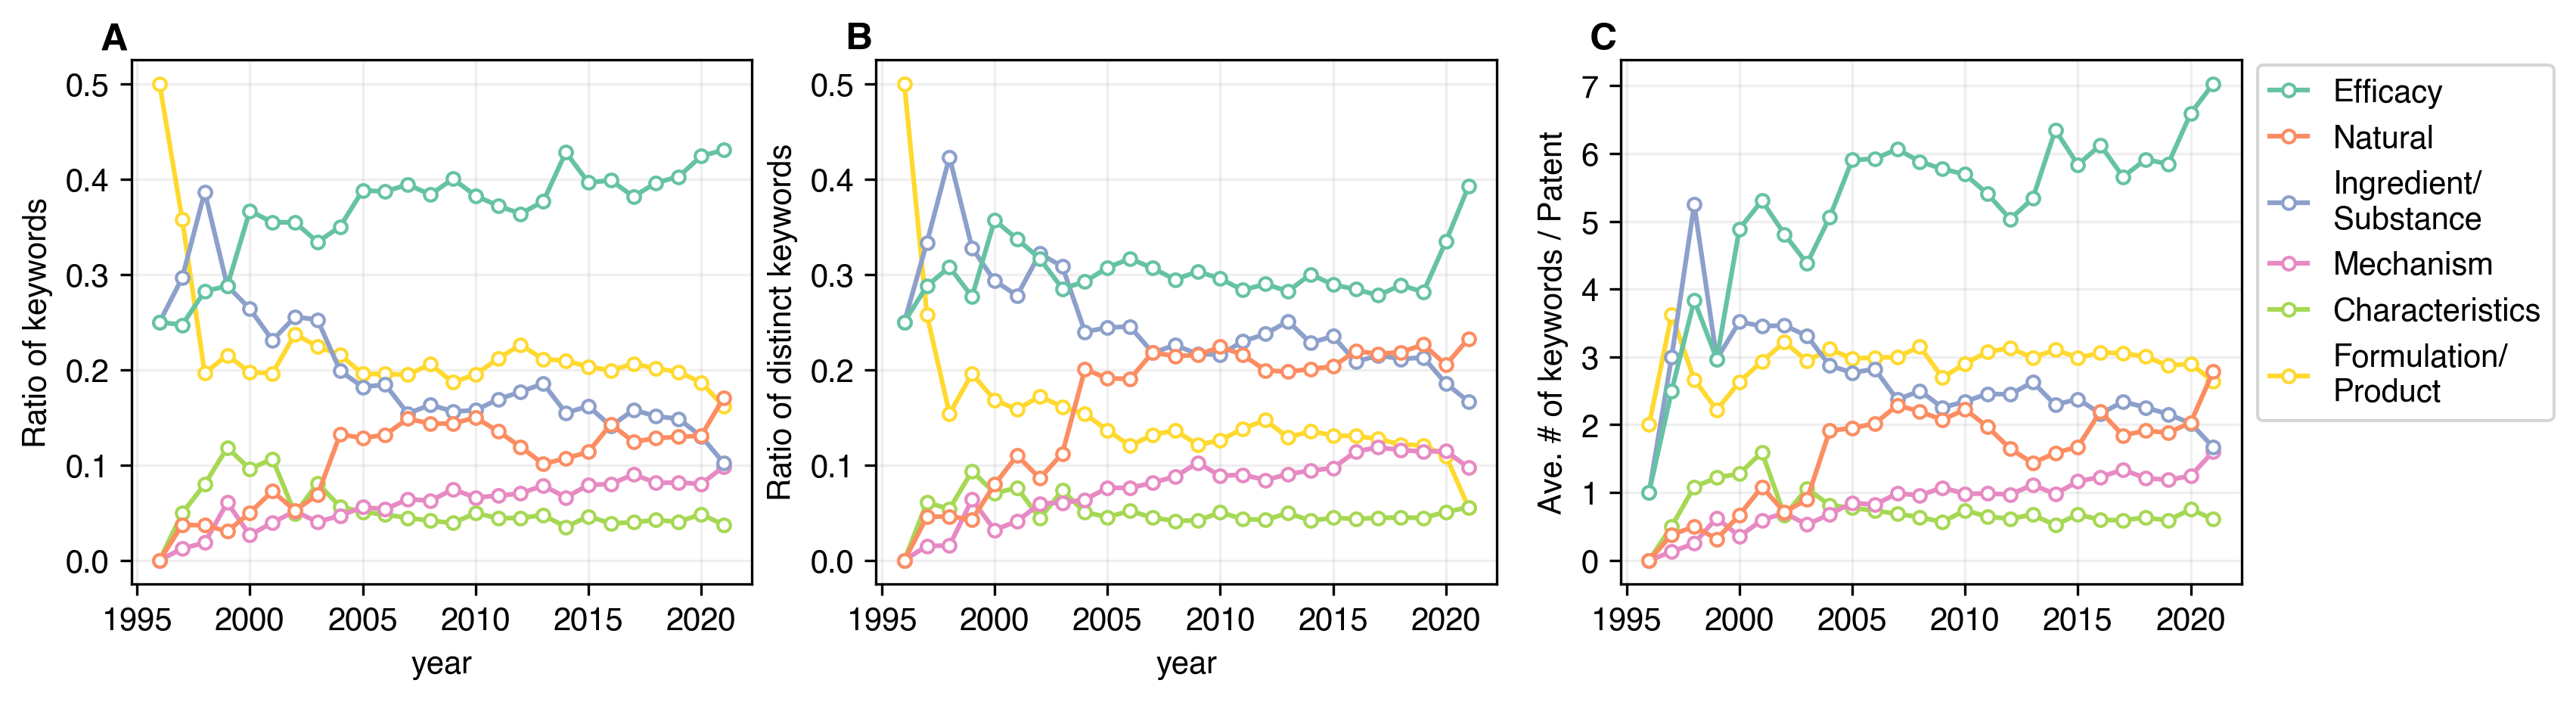

In [100]:
import string
import seaborn as sns

N_ROW = 1
N_COL = 3
X_SIZE = 4
Y_SIZE = 3
DPI = 300
# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

# Set the color palette
palette = sns.color_palette("Set2")
# palette = sns.color_palette("husl", 8)
col_ordered = temp2.loc[2021].sort_values()[::-1].index

fig = plt.figure(figsize=(X_SIZE * N_COL, Y_SIZE * N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)  # , width_ratios=[1,1,.1], wspace=.3
axes = []

axi = 0
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL])  # row, col
ax.text(-.05, 1.02, '%s' % (string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

_temp = (temp.T / temp.sum(axis=1)).T
for axi, (column, color) in enumerate(zip(col_ordered, palette)):
    _temp[column].plot(marker='o', markersize=4, markerfacecolor="white", ax=ax, color=color, zorder=100-axi)
# (temp.T / temp.sum(axis=1)).T.plot()
plt.grid(alpha=.2)
# plt.legend("none")
# plt.legend(title=None, ncol=1, handlelength=1.2, )
plt.ylabel("Ratio of keywords")
# plt.xlim([1996,2021])
# plt.ylim([0, 0.5])

axi = 1
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL])  # row, col
ax.text(-.05, 1.02, '%s' % (string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

_temp = (temp2.T / temp2.sum(axis=1)).T
for axi, (column, color) in enumerate(zip(col_ordered, palette)):
    _temp[column].plot(marker='o', markersize=4, markerfacecolor="white", ax=ax, color=color, zorder=100-axi)
plt.grid(alpha=.2)
# (temp.T / temp.sum(axis=1)).T.plot()
# # plt.legend(title=None, ncol=1, handlelength=1.1, bbox_to_anchor=(1, 1.02))
# plt.legend(title=None, ncol=1, handlelength=1.2, bbox_to_anchor=(1, 1.02), labels=[label for label in col_ordered])
plt.ylabel("Ratio of distinct keywords")
# plt.xlim([1996,2021])
# plt.ylim([0, 0.5])



axi = 2
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL])  # row, col
ax.text(-.05, 1.02, '%s' % (string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

grouped = _df_cate.groupby('year')
mean_values = grouped.mean()
std_values = grouped.std()
quantile_25 = grouped.quantile(0.25)
quantile_75 = grouped.quantile(0.75)

lines = []
for axi, (column, color) in enumerate(zip(col_ordered, palette)):
    mean_line = ax.plot(
        mean_values.index,  # X-axis: index of mean_values
        mean_values[column],  # Y-axis: values for the column
        marker='o', markersize=4, markerfacecolor="white", color=color, zorder=100 - axi, label=column
    )[0]
    # quantile_75[column].plot(linestyle='--', linewidth=.5, ax=ax, color=color, zorder=50-axi)
    # quantile_25[column].plot(linestyle='--', linewidth=.5, ax=ax, color=color, zorder=50-axi)
    lines.append(mean_line)

# Create a custom dashed line legend
dashed_line_legend = mlines.Line2D(
    [], [], linestyle='--', linewidth=0.5, color='black', label='75th Quantile'
)

plt.legend(handles=lines, title=None, ncol=1, handlelength=1.2, bbox_to_anchor=(1, 1.02))
# plt.legend(
#     handles=lines + [dashed_line_legend],  # Add custom dashed line to legend
#     labels=col_ordered.tolist() + ['75th Quantile'],  # Add label for the dashed line
#     title=None, 
#     ncol=1, 
#     handlelength=1.2, 
#     bbox_to_anchor=(1, 1.02)
# )
plt.grid(alpha=.2)
plt.ylabel("Ave. # of keywords / Patent")

plt.show()

In [89]:
quantile_75

Technique/\nManufacturing  Mechanism  Ingredient/\nSubstance  \
year                                                                 
1996                        0.0       0.00                    1.00   
1997                        1.0       0.00                    4.50   
1998                        1.0       0.25                    8.25   
1999                        1.0       1.00                    4.25   
2000                        1.0       1.00                    4.00   
2001                        1.0       1.00                    5.00   
2002                        2.0       1.00                    4.00   
2003                        1.0       1.00                    5.00   
2004                        2.0       1.00                    5.00   
2005                        1.0       1.00                    4.00   
2006                        1.0       1.00                    4.00   
2007                        1.0       1.00                    4.00   
2008                        2.0       1.00                    4.00   
2009                        1.0       1.00                    3.00   
2010                        1.0       1.00                    4.00   
2011                        2.0       1.00                    3.00   
2012                        2.0       1.00                    3.00   
2013                        2.0       1.00                    4.00   
2014                        1.0       1.00                    3.00   
2015                        2.0       1.00                    3.00   
2016                        2.0       1.00                    3.00   
2017                        2.0       1.00                    3.00   
2018                        2.0       1.00                    3.00   
2019                        2.0       1.00                    3.00   
2020                        2.0       1.00                    3.00   
2021                        1.0       0.00                    3.00   

      Formulation/\nProduct  Natural  Characteristics  Efficacy  
year                                                             
1996                    2.0     0.00             0.00      1.00  
1997                    5.0     1.00             1.00      3.50  
1998                    4.0     0.25             2.25      5.25  
1999                    3.0     0.00             1.00      5.00  
2000                    4.0     0.00             2.00      7.00  
2001                    4.0     1.00             2.00      8.00  
2002                    4.0     1.00             1.00      6.00  
2003                    4.0     1.00             2.00      6.00  
2004                    4.0     2.00             1.00      7.00  
2005                    4.0     2.00             1.00      8.00  
2006                    4.0     2.00             1.00      8.00  
2007                    4.0     2.00             1.00      8.00  
2008                    4.0     3.00             1.00      9.00  
2009                    4.0     3.00             1.00      8.00  
2010                    4.0     3.00             1.00      8.00  
2011                    4.0     2.00             1.00      8.00  
2012                    4.0     2.00             1.00      7.75  
2013                    4.0     2.00             1.00      8.00  
2014                    4.0     2.00             1.00      9.00  
2015                    4.0     2.00             1.00      9.00  
2016                    4.0     2.00             1.00      9.00  
2017                    4.0     2.00             1.00      8.00  
2018                    4.0     2.00             1.00      8.00  
2019                    4.0     2.00             1.00      8.00  
2020                    4.0     3.00             1.00     10.00  
2021                    4.0     3.00             1.00      9.00

In [99]:
mean_values

Technique/\nManufacturing  Mechanism  Ingredient/\nSubstance  \
year                                                                 
1996                   0.000000   0.000000                1.000000   
1997                   0.375000   0.125000                3.000000   
1998                   0.833333   0.250000                5.250000   
1999                   0.812500   0.625000                2.968750   
2000                   0.888889   0.351852                3.518519   
2001                   0.759259   0.592593                3.453704   
2002                   1.028169   0.697183                3.464789   
2003                   0.914894   0.526596                3.308511   
2004                   1.099668   0.677741                2.873754   
2005                   0.982625   0.847490                2.766409   
2006                   0.869947   0.820738                2.822496   
2007                   1.064320   0.986650                2.367718   
2008                   1.185039   0.958005                2.501312   
2009                   1.005889   1.073027                2.252061   
2010                   1.087470   0.981087                2.342790   
2011                   1.192661   0.985583                2.454784   
2012                   1.114883   0.971279                2.447781   
2013                   1.177921   1.112540                2.628081   
2014                   1.068702   0.977863                2.294656   
2015                   1.207084   1.164169                2.378747   
2016                   1.255955   1.229332                2.163942   
2017                   1.202359   1.336207                2.338475   
2018                   1.175330   1.212335                2.255947   
2019                   1.196310   1.186058                2.155305   
2020                   1.176125   1.244618                2.021526   
2021                   0.787879   1.606061                1.666667   

      Formulation/\nProduct   Natural  Characteristics  Efficacy  
year                                                              
1996               2.000000  0.000000         0.000000  1.000000  
1997               3.625000  0.375000         0.500000  2.500000  
1998               2.666667  0.500000         1.083333  3.833333  
1999               2.218750  0.312500         1.218750  2.968750  
2000               2.629630  0.666667         1.277778  4.888889  
2001               2.935185  1.083333         1.592593  5.305556  
2002               3.218310  0.711268         0.661972  4.809859  
2003               2.941489  0.898936         1.058511  4.377660  
2004               3.116279  1.910299         0.813953  5.059801  
2005               2.974903  1.951737         0.772201  5.905405  
2006               2.991213  2.015817         0.732865  5.922671  
2007               2.996359  2.287621         0.684466  6.065534  
2008               3.152231  2.195538         0.636483  5.880577  
2009               2.693757  2.070671         0.564193  5.772674  
2010               2.901891  2.228132         0.737589  5.693853  
2011               3.076016  1.968545         0.642202  5.404980  
2012               3.130548  1.646214         0.614883  5.033943  
2013               2.988210  1.434084         0.672026  5.336549  
2014               3.108397  1.584733         0.519084  6.348855  
2015               2.986376  1.674387         0.679155  5.833787  
2016               3.063522  2.195703         0.593648  6.127043  
2017               3.056261  1.843013         0.591652  5.656080  
2018               3.004846  1.911894         0.630396  5.914097  
2019               2.870323  1.882112         0.586879  5.846233  
2020               2.900196  2.031311         0.753425  6.592955  
2021               2.636364  2.787879         0.606061  7.030303

# What type of keywords is used with specific keywords
- Count pair of keywords

In [14]:
import pandas as pd
import networkx as nx
from itertools import combinations

# Example: Load your dataframe (df)
# Replace with your actual dataframe loading method
# df = pd.read_csv("your_file.csv", index_col=0)

# Initialize a graph
G = nx.Graph()

# Convert the DataFrame to a boolean matrix
boolean_matrix = (df > 0).astype(int)

# Iterate through all column combinations (patents)
for col in tqdm(df.columns):
    # Find keywords with non-zero values in the current column
    active_keywords = df.index[boolean_matrix[col] > 0].tolist()
    
    # Add edges between all pairs of active keywords
    for keyword1, keyword2 in combinations(active_keywords, 2):
        if G.has_edge(keyword1, keyword2):
            G[keyword1][keyword2]['weight'] += 1
        else:
            G.add_edge(keyword1, keyword2, weight=1)

# Convert the graph edges to a DataFrame for analysis
edges = nx.to_pandas_edgelist(G)
edges = edges.sort_values(by="weight", ascending=False)

# Display the edge list with weights
import ace_tools as tools; tools.display_dataframe_to_user(name="Network-Based Keyword Co-occurrence Edges", dataframe=edges)


100%|███████████████████████████████████| 19564/19564 [00:09<00:00, 1978.96it/s]


ModuleNotFoundError: No module named 'ace_tools'

In [32]:
# Initialize a graph
G2 = nx.Graph()

# Iterate through all columns (patents)
for col in tqdm(_df_cate.columns):
    # Extract non-zero types and their counts in the current column
    active_types = _df_cate[_df_cate[col] > 0].index.tolist()
    counts = _df_cate[col][_df_cate[col] > 0]

    # Add edges between all pairs of active types, including self-loops
    for type1, type2 in combinations(active_types, 2):
        weight = min(counts[type1], counts[type2])  # Co-occurrence weight
        if G2.has_edge(type1, type2):
            G2[type1][type2]['weight'] += weight
        else:
            G2.add_edge(type1, type2, weight=weight)

    # Add self-loops for each type
    for type1 in active_types:
        self_weight = counts[type1] * (counts[type1] - 1) // 2  # Combination of type occurrences in a column
        if G2.has_edge(type1, type1):
            G2[type1][type1]['weight'] += self_weight
        else:
            G2.add_edge(type1, type1, weight=self_weight)

# Convert the graph edges to a DataFrame for analysis
edges = nx.to_pandas_edgelist(G2)
edges = edges.sort_values(by="weight", ascending=False)

100%|████████████████████████████████████| 19564/19564 [00:34<00:00, 572.66it/s]


In [37]:
df_raw['출원연도']

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
19559    1997
19560    1997
19561    1997
19562    1997
19563    1996
Name: 출원연도, Length: 19564, dtype: int64

In [493]:
df_raw.columns

Index(['SEQ', '출원번호', '출원연도', '제목(한글)', '제목(영문)', '초록', 'kw', '인용수', '청구항수',
       '독립항수', '패밀리수', '공개번호', '공개연도', '등록번호', '등록연도', '원출원번호', '원출원일',
       '우선권 번호', '우선출원국가', 'PRIYEAR', '우선권번호 정보', '출원인 원본(국적 + 명칭)',
       '출원인 표준화 영문(국적 + 명칭)', '출원인 표준화 한글(국적 + 명칭)', '출원인 유형',
       '출원인 주소 (광역시·도)', '권리자 (국적 + 명칭)', '권리자 주소 (광역시·도)', '발명인 (국적 + 명칭)',
       '발명인 주소 (광역시·도)', '사업자등록번호', '법인번호', 'IPC 분류', 'CPC 분류', '부처명',
       '과제 고유번호', '주관기관', '연구사업명', '연구과제명', '현재법적상태명'],
      dtype='object')